In [2]:
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import sys

In [7]:
# To be able to load our module scripts
module_path = Path('.').resolve().parent
if str(module_path) not in sys.path:
    sys.path.append(str(module_path))

In [11]:
from src.config import SLIDE_DIR, ROOT_DIR
from src.datagens import WSIDatagen
from src.datagens import DataSource

In [4]:
seed = 767593

In [5]:
def load_params(params_filepath):
    with params_filepath.open('r') as params_f:
        params = json.load(params_f)
        return params
params = load_params(Path('/mnt/data/crc_ml/configs/level1.json'))
params['seed'] = seed
params['data']['dataset'] = '/mnt/data/crc_ml/data/processed/Prostata/level1/r512px/c256px/t512px/no_overlap/datasets/1602530237.h5'    # L1 DATASET
#params['data']['dataset'] = '/mnt/data/crc_ml/data/processed/Prostata/level0/r512px/c256px/t512px/no_olap_L0/datasets/1602550399.h5'   # L0 DATASET
params['train']['validation_steps'] = 10000
params['train']['steps_per_epoch'] = 2500
print(params['seed'])
np.random.seed(params['seed'])

767593


In [9]:
from collections import Counter
from tensorflow.keras.utils import HDF5Matrix
import pandas as pd

In [15]:
c = Counter()
for coord_map in HDF5Matrix(params['data']['dataset'], 'train'):
    df = pd.read_pickle(ROOT_DIR / coord_map).center_tumor_tile
    c += Counter(df)
print(c)

Counter({False: 6513435, True: 1365240})


In [6]:
params['data']['augmenters']['contrast'] = [0.7,1.3]

In [7]:
# Create datasources
print('Creating datasources')
ds = DataSource()
ds.add_dataset(params['data']['dataset'], 'train')
train_ds, valid_ds = ds.split(0.10)
test_ds = DataSource()
test_ds.add_dataset(params['data']['dataset'], 'test')

# Create datagen
print('Creating datagen')
datagen = WSIDatagen(params, slide_dir=SLIDE_DIR)

Creating datasources
Creating datagen


In [8]:
train_gen, valid_gen = datagen.get_training_generator(train_ds=train_ds, valid_ds=valid_ds, train_augment=True, valid_augment=False)
test_gen = datagen.get_sequential_generator(test_ds, use_augment=False)

In [10]:
train_gen.coords

[('P-2016_5331-09-1', (46848, 89088), True),
 ('P-2016_0277-13-1', (38912, 128640), True),
 ('P-2016_1132-07-0', (66816, 130944), False),
 ('P-2016_0867-06-0', (84608, 132992), False),
 ('P-2016_1094-06-1', (21248, 156544), True),
 ('P-2016_5331-11-1', (59392, 94720), True),
 ('P-2016_1200-02-0', (42496, 33792), False),
 ('P-2016_0277-13-1', (55808, 157312), True),
 ('P-2019_4336-07-1', (73472, 16768), True),
 ('P-2016_0883-02-0', (35072, 132096), False),
 ('P-2016_2284-05-1', (70912, 38144), True),
 ('P-2016_1442-02-0', (96640, 72832), False),
 ('P-2016_3055-09-1', (31360, 72320), True),
 ('P-2016_2243-09-0', (62976, 27136), False),
 ('P-2016_0749-01-0', (54272, 137728), False),
 ('P-2016_1399-10-1', (54912, 89472), True),
 ('P-2019_7486-03-0', (55680, 91648), False),
 ('P-2019_2513-09-0', (32640, 20864), False),
 ('P-2016_2494-08-1', (28928, 61312), True),
 ('P-2016_1214-09-0', (18048, 168448), False),
 ('P-2019_1427-09-1', (21888, 24448), True),
 ('P-2016_0121-07-0', (36864, 211712)

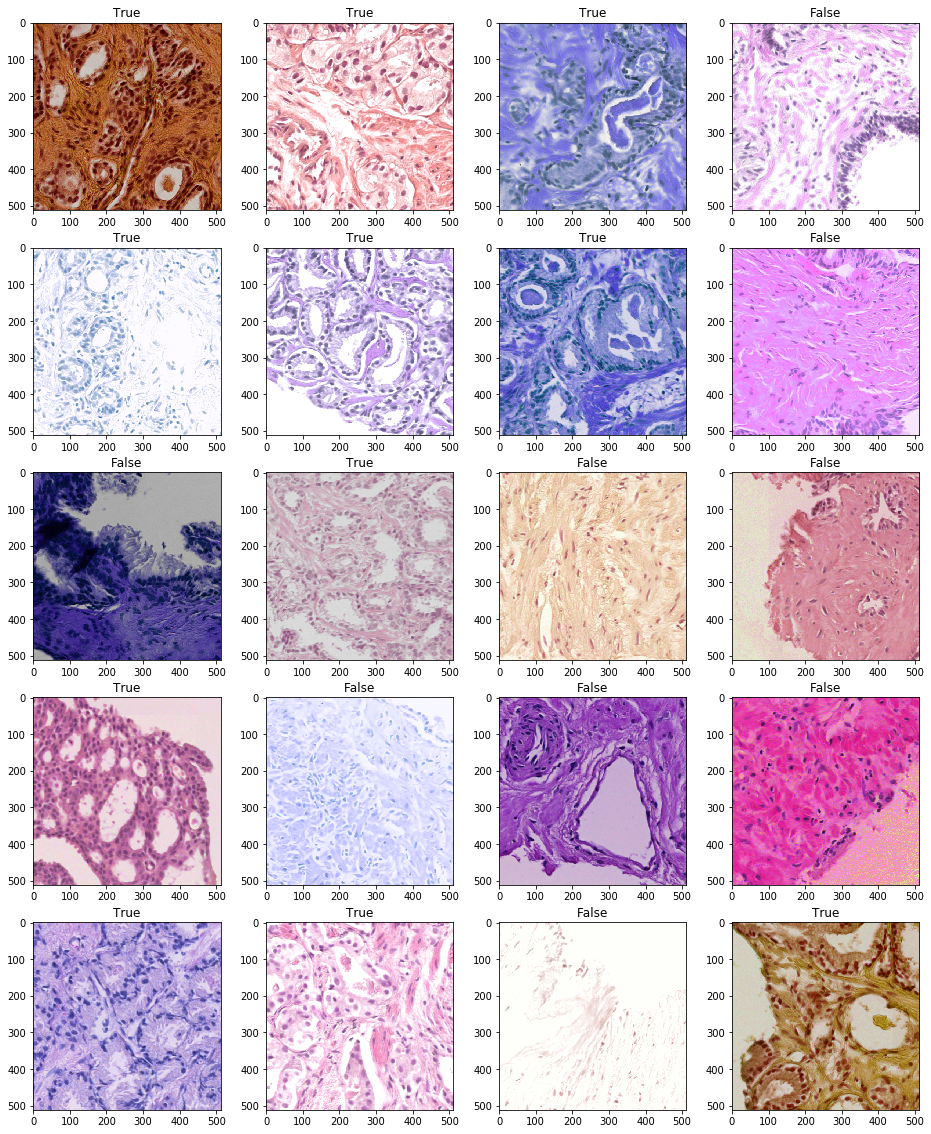

In [80]:
w=10
h=10
h = 5
c = 4
fig=plt.figure(figsize=(c*4, h*4))
for i in range(1, h*c+1):
    X,y = train_gen[10*i]
    img = ((X[0] + 1) * 127.5).astype(np.uint8)
    ax = fig.add_subplot(h, c, i)
    ax.title.set_text(y[0])
    plt.imshow(img)
plt.show()

In [81]:
train_gen.on_epoch_end()

[2020-10-13 07:14:19][INFO ][generator] Random generator resampled.


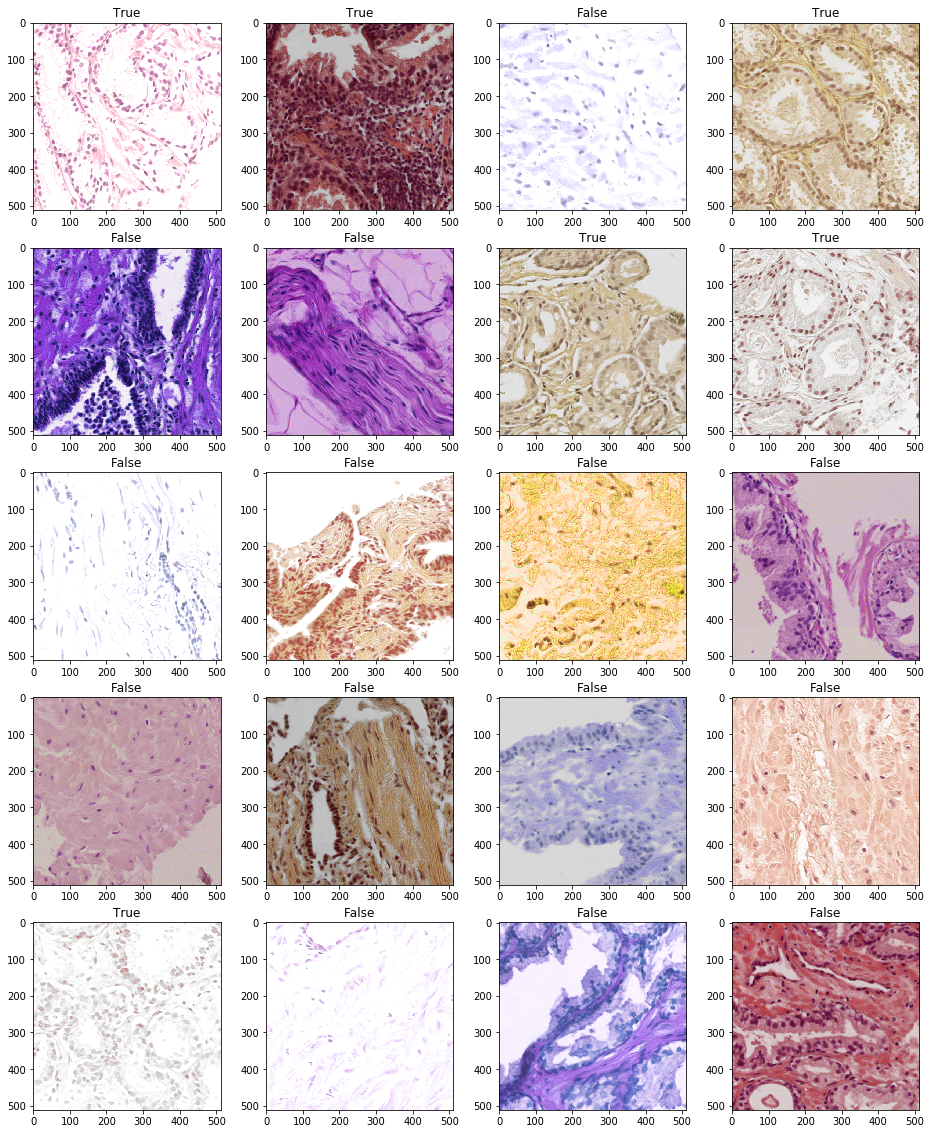

In [83]:
w=10
h=10
h = 5
c = 4
fig=plt.figure(figsize=(c*4, h*4))
for i in range(1, h*c+1):
    X,y = train_gen[10*i]
    img = ((X[0] + 1) * 127.5).astype(np.uint8)
    ax = fig.add_subplot(h, c, i)
    ax.title.set_text(y[0])
    plt.imshow(img)
plt.show()